This notebook is intended to produce a side-by-side figure for the midi2params task.

In [54]:
import os
import numpy as np
import pretty_midi
import matplotlib.pyplot as plt
from wavegenie.audio_io import load_audio, save_wav
from wavegenie.util import preview_audio, DDSP_DEFAULT_FS_AUDIO

midi_folder = '/juice/scr/rjcaste/curis/wavegenie/data/DDSPViolin/midi/train/clips'
audio_folder = '/juice/scr/rjcaste/curis/wavegenie/data/DDSPViolin/wav/train/clips'

In [55]:
f_id = os.path.splitext(np.random.choice(os.listdir(midi_folder)))[0]
print(f_id)
midi_fpath = os.path.join(midi_folder, f_id + '.midi')
audio_fpath = os.path.join(audio_folder, f_id + '.wav')

BWV1002_Mvt_3-5


In [56]:
print('Using', midi_fpath)

Using /juice/scr/rjcaste/curis/wavegenie/data/DDSPViolin/midi/train/clips/BWV1002_Mvt_3-5.midi


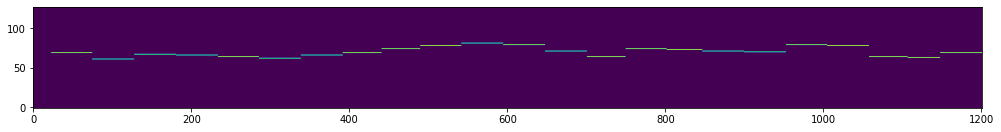

In [62]:
midi = pretty_midi.PrettyMIDI(midi_fpath)
plt.figure(figsize=(17, 17))
plt.imshow(midi.get_piano_roll(fs=250), origin='lower')

In [58]:
print('Using', os.path.split(audio_fpath)[1])

Using BWV1002_Mvt_3-5.wav


In [59]:
audio, fs = load_audio(
    audio_fpath,
    DDSP_DEFAULT_FS_AUDIO,
    num_channels=1,
    normalize=True)

preview_audio(audio)

In [63]:
from wavegenie.util import extract_ddsp_synthesis_parameters

audio_parameters = extract_ddsp_synthesis_parameters(audio)

/u/nlp/anaconda/main/anaconda3/envs/wavegenie37/lib/python3.7/site-packages/librosa/core/time_frequency.py:1208: RuntimeWarning: divide by zero encountered in log10
  - 0.5 * np.log10(f_sq + const[3]))


In [74]:
midi.get_piano_roll(fs=250).shape

(128, 1201)

In [76]:
midi.get_end_time()

4.804479166666667

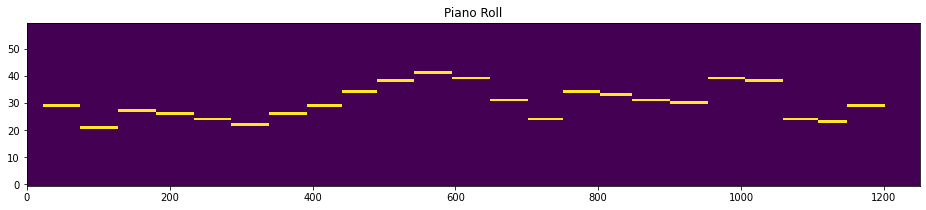

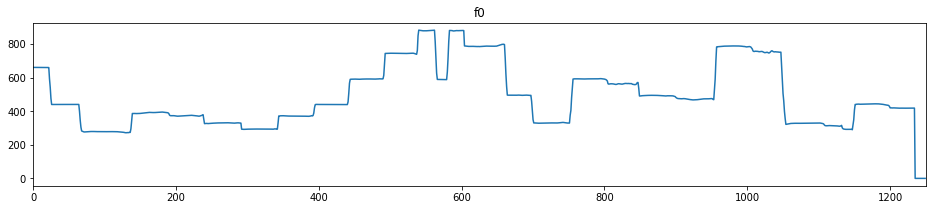

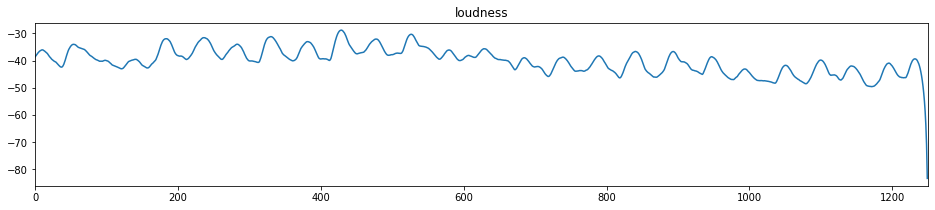

In [84]:
plt.figure(figsize=(16, 3))
plt.title('Piano Roll')
roll = midi.get_piano_roll(fs=250)
roll = np.pad(roll, ((0, 0), (0, 1250 - roll.shape[1])), mode='constant')
roll = roll[40:100]
plt.imshow(roll, origin='lower', interpolation='nearest', aspect='auto')
plt.xlim(0, 1250)
plt.show()
plt.figure(figsize=(16, 3))
plt.title('f0')
plt.plot(audio_parameters['f0_hz'])
plt.xlim(0, 1250)
plt.show()
plt.figure(figsize=(16, 3))
plt.title('loudness')
plt.plot(audio_parameters['loudness_db'])
plt.xlim(0, 1250)
plt.show()